# Exploring Distributions with Movies Data 

- onl01-dtsc-ft-022221
- 03/25/21

## Learning Objectives

- To relate the concepts of distributions and normality back to data we are familiar with.
- To discuss outliers, ways to detect them and remove them.
- To discuss Z-scores and the ways we can calculate them.
- To discuss normality and how to asses it


## Announcements

- [ ] Changes to Central Lecturer Recording format (good news!)
- [ ] Study Group Time Shift Poll
- Will return to probability questions next Friday when we cover Topic 17 (another probably-question-heavy topic)

### Questions

# Distributions with Movies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('seaborn-talk')

In [2]:
df = pd.read_csv('joined_movie_data_for_sg.csv')
display(df.head())
df.info()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,revenue-domestic,revenue-worldwide,lost_money,roi-domestic,roi-worldwide,release_month
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",-169536125.0,6.350639e+08,True,-41.289850,154.667286,5
1,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-307237650.0,-2.002376e+08,True,-87.782186,-57.210757,6
2,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",128405868.0,1.072414e+09,False,38.840250,324.384139,5
3,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",378815482.0,1.748134e+09,False,126.271827,582.711400,4
4,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",-70975705.0,3.559452e+08,True,-23.658568,118.648403,11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3467 entries, 0 to 3466
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3467 non-null   int64  
 1   release_date       3467 non-null   object 
 2   movie              3467 non-null   object 
 3   production_budget  3467 non-null   float64
 4   domestic_gross     3467 non-null   float64
 5   worldwide_gross    3467 non-null   float64
 6   tconst             3467 non-null   object 
 7   primary_title      3467 non-null   object 
 8   original_title     3467 non-null   object 
 9   start_year         3467 non-null   int64  
 10  runtime_minutes    3056 non-null   float64
 11  genres             3467 non-null   object 
 12  revenue-domestic   3467 non-null   float64
 13  revenue-worldwide  3467 non-null   float64
 14  lost_money         3467 non-null   bool   
 15  roi-domestic       3467 non-null   float64
 16  roi-worldwide      3467 

## Visualizing Distributions

> - I want to visualize the distribution of domestic gross. 
    - Q: What types of plots do I have that let me do so?
- [ ] Plot the Histogram and KDE 

In [ ]:
sns.histplot
plt.hist
sns.boxplot
sns.displot

<AxesSubplot:xlabel='domestic_gross', ylabel='Count'>

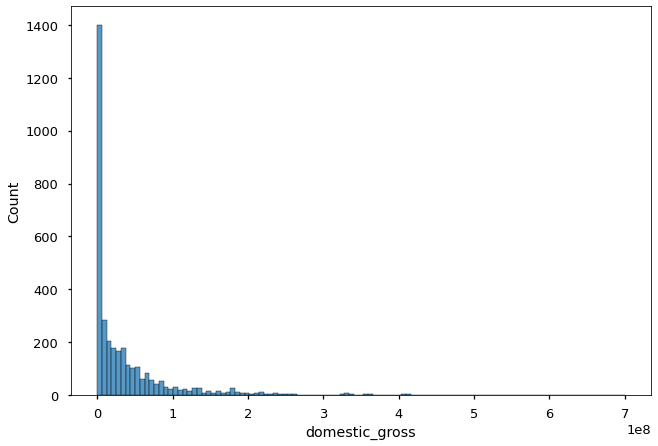

In [5]:
sns.histplot(df['domestic_gross'])

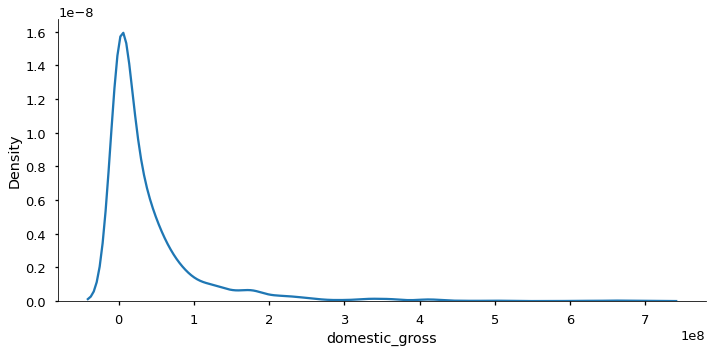

In [9]:
sns.displot(data=df, x='domestic_gross',aspect=2,kind='kde')

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='domestic_gross', ylabel='Density'>

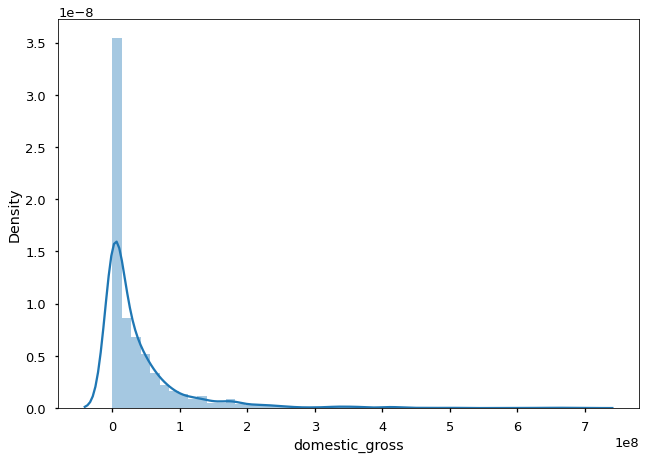

In [11]:
sns.distplot(df['domestic_gross'])

<AxesSubplot:xlabel='domestic_gross'>

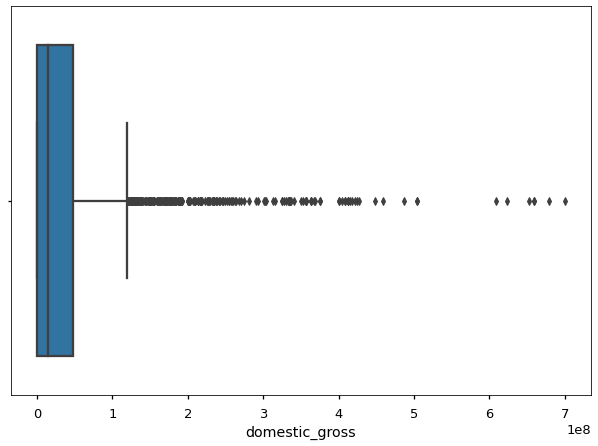

In [6]:
sns.boxplot(data=df, x='domestic_gross')

### Median vs Mean

> Exploring median and mean with movies

In [13]:
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
## View .describe
df['domestic_gross'].describe()

count         3,467.00
mean     40,025,881.00
std      69,628,617.27
min               0.00
25%         373,375.00
50%      14,218,868.00
75%      48,265,581.00
max     700,059,566.00
Name: domestic_gross, dtype: float64

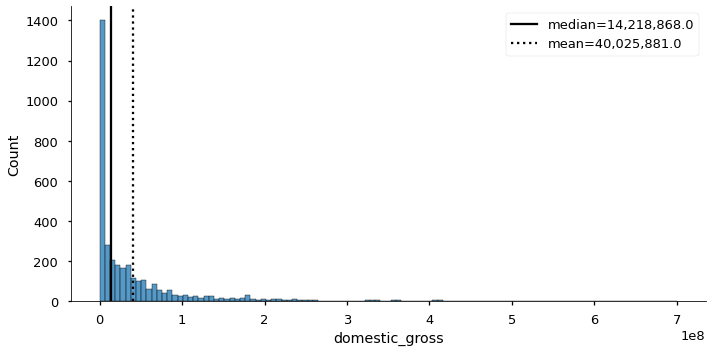

In [24]:
## Plot displot + mean and mean
g = sns.displot(data=df, x='domestic_gross',aspect=2)

median = df['domestic_gross'].median().round(2)
mean = df['domestic_gross'].mean().round(2)
g.ax.axvline(median,label=f'median={median:,}',color='black')
g.ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
g.ax.legend()

### Skew and Kurtosis

In [25]:
from scipy import stats

In [26]:
# skew
stats.skew(df['domestic_gross'],bias=False)

3.7369306147518566

In [27]:
# kurtosis
stats.kurtosis(df['domestic_gross'],bias=False)

19.964490781294813

#### Compare that revenue-domestic

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


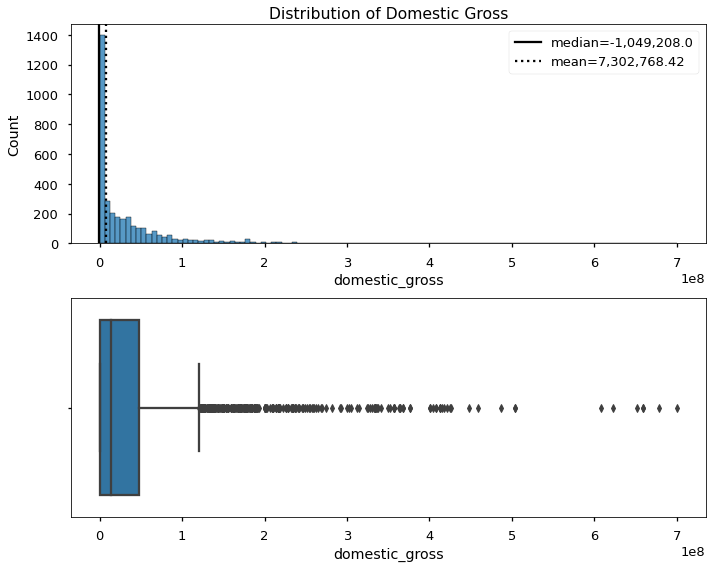

In [38]:
## Repeat for revnue domestic 
fig, ax = plt.subplots(nrows=2,figsize=(10,8))
sns.histplot(df['domestic_gross'], ax=ax[0])

ax[0].set_title("Distribution of Domestic Gross")
ax[0].axvline(median,label=f'median={median:,}',color='black')
ax[0].axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
ax[0].legend()

sns.boxplot(df['domestic_gross'],ax=ax[1])
fig.tight_layout()

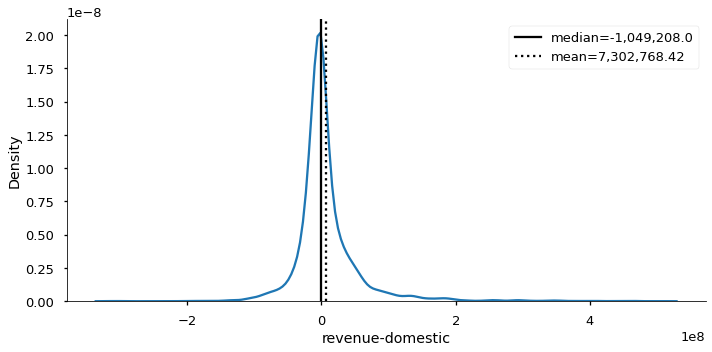

In [31]:
## Plot displot + mean and mean
g = sns.displot(data=df, x='revenue-domestic',aspect=2,kind='kde')

median = df['revenue-domestic'].median().round(2)
mean = df['revenue-domestic'].mean().round(2)
g.ax.axvline(median,label=f'median={median:,}',color='black')
g.ax.axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
g.ax.legend()

In [30]:
# skew
print(stats.skew(df['revenue-domestic'],bias=False))
stats.kurtosis(df['revenue-domestic'],bias=False)

3.094125271540967


20.182936218192015

### What do we notice about the two distributions?

- Are they normal?

In [53]:
## Functionize the above process

def plot_distribution(df, col='domestic_gross'):
    ## Plot displot + mean and mean
    median = df[col].median().round(2)
    mean = df[col].mean().round(2)
    ## Repeat for revnue domestic 
    fig, ax = plt.subplots(nrows=2,figsize=(10,8))
    sns.histplot(data=df[col], ax=ax[0])

    ax[0].set_title(F"Distribution of {col}")
    ax[0].axvline(median,label=f'median={median:,}',color='black')
    ax[0].axvline(mean,label=f'mean={mean:,}',color='black',ls=':')
    ax[0].legend()

    sns.boxplot(data=df ,x=col,ax=ax[1])
    fig.tight_layout()
    plt.show()
    skew_val = stats.skew(df[col], bias=False)
    kurt_val = stats.kurtosis(df[col],bias=False)
    print(f"Skew = {skew_val}")
    print(f"Kurtosis = {kurt_val}")
    return fig, ax

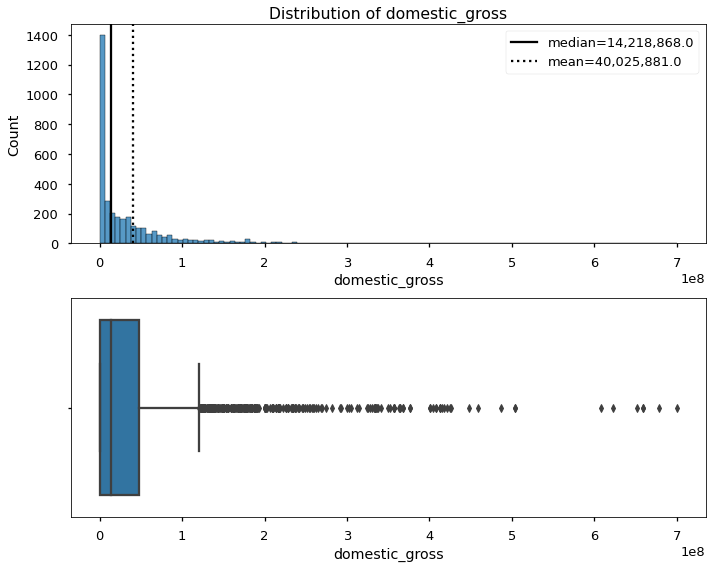

Skew = 3.7369306147518566
Kurtosis = 19.964490781294813


In [54]:
## test func domestic_gross
plot_distribution(df);

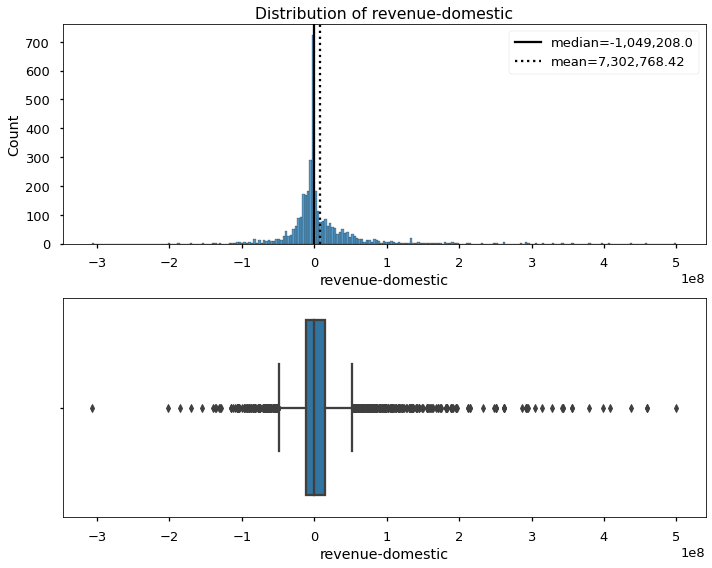

Skew = 3.094125271540967
Kurtosis = 20.182936218192015


In [55]:
## test func revenue 
plot_distribution(df,col='revenue-domestic');

## Z-Scores

In [86]:
from scipy import stats

In [87]:
## Calculate Z-Scores with Scipy for cols in a new outlier df

cols = ['worldwide_gross','domestic_gross','revenue-domestic','revenue-worldwide']


outliers_df = df[cols].copy()
outliers_df = outliers_df[outliers_df['domestic_gross'] >0]
for col in cols:
    outliers_df[f"{col}_Z"] = stats.zscore(outliers_df[col])
outliers_df

,worldwide_gross,domestic_gross,revenue-domestic,revenue-worldwide,worldwide_gross_Z,domestic_gross_Z,revenue-domestic_Z,revenue-worldwide_Z
0,"1,045,663,875.00","241,063,875.00","-169,536,125.00","635,063,875.00",4.75,2.66,-3.37,3.42
1,"149,762,350.00","42,762,350.00","-307,237,650.00","-200,237,650.00",0.20,-0.05,-5.95,-1.66
2,"1,403,013,963.00","459,005,868.00","128,405,868.00","1,072,413,963.00",6.56,5.64,2.23,6.07
3,"2,048,134,200.00","678,815,482.00","378,815,482.00","1,748,134,200.00",9.84,8.64,6.93,10.17
4,"655,945,209.00","229,024,295.00","-70,975,705.00","355,945,209.00",2.77,2.49,-1.51,1.72
...,...,...,...,...,...,...,...,...
3449,"195,043.00","195,043.00","170,043.00","170,043.00",-0.55,-0.64,-0.18,-0.44
3450,"195,043.00","195,043.00","170,043.00","170,043.00",-0.55,-0.64,-0.18,-0.44
3462,"138,711.00","138,711.00","128,711.00","128,711.00",-0.55,-0.64,-0.18,-0.44
3463,"94,596.00","94,596.00","84,596.00","84,596.00",-0.55,-0.64,-0.18,-0.44


In [88]:
stats.zscore(outliers_df['domestic_gross'])

array([ 2.65728292, -0.05460591,  5.6377666 , ..., -0.637509  ,
       -0.6381123 , -0.63934326])

#### Plot revenue domestic and its z-scores

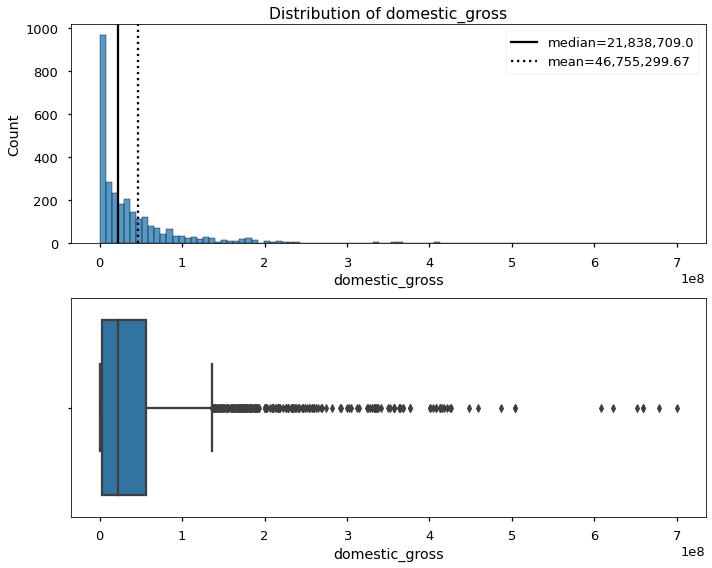

Skew = 3.51804925808834
Kurtosis = 17.683105007085487


In [89]:
## normal vers
plot_distribution(outliers_df, col='domestic_gross');

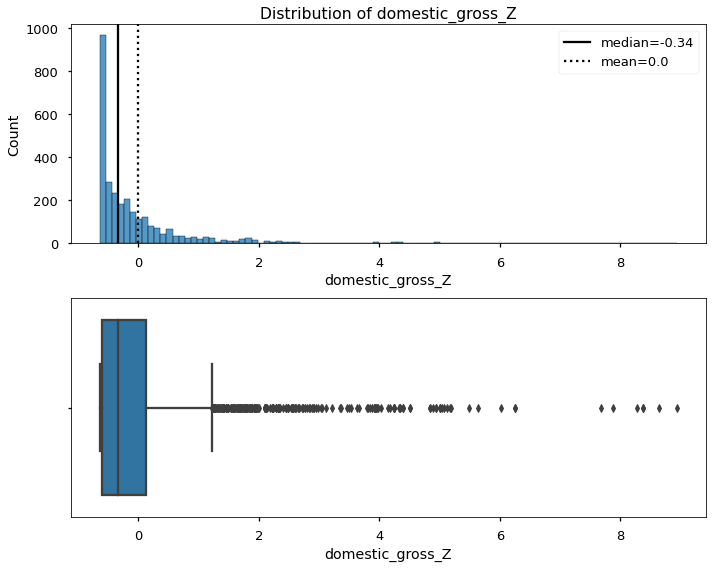

Skew = 3.51804925808834
Kurtosis = 17.683105007085487


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of domestic_gross_Z'}, xlabel='domestic_gross_Z', ylabel='Count'>,
        <AxesSubplot:xlabel='domestic_gross_Z'>], dtype=object))

In [90]:
## z-score vers
plot_distribution(outliers_df, col='domestic_gross_Z')


### Finding Outliers

- ~Two ways:
    - Absolute Z-scores > 3
    - IQR Rule

In [91]:
## Calc outliers using zscore rule for domestic_gross
idx_outliers = outliers_df['domestic_gross_Z'].abs() > 3
idx_outliers

0       False
1       False
2        True
3        True
4       False
        ...  
3449    False
3450    False
3462    False
3463    False
3464    False
Name: domestic_gross_Z, Length: 2968, dtype: bool

#### Use our function to visualize the data without outleirs

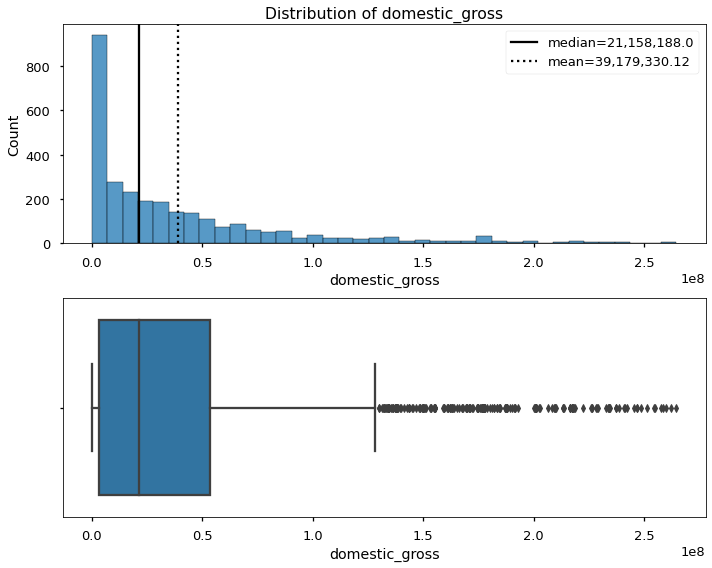

Skew = 1.935656347164555
Kurtosis = 3.7225226118905956


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of domestic_gross'}, xlabel='domestic_gross', ylabel='Count'>,
        <AxesSubplot:xlabel='domestic_gross'>], dtype=object))

In [92]:
plot_distribution(outliers_df[~idx_outliers])

### What do we notice?

- Are all outliers removed?

- IQR_cutoff = (Q3 - Q1)*1.5

In [93]:
q1 =  df['domestic_gross'].quantile(0.25)
q3 =  df['domestic_gross'].quantile(0.75)
IQR_cutoff = (q3-q1)*1.5
IQR_cutoff

71838309.0

In [94]:
idx_outliers = (outliers_df['domestic_gross'] < (q1-IQR_cutoff)) | (outliers_df['domestic_gross'] > (q3+IQR_cutoff))


In [95]:
outliers_df['log_domestic_gross'] = np.log(df['domestic_gross'])
outliers_df['log_domestic_gross'].describe()

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count   2,968.00
mean       16.11
std         2.57
min         5.96
25%        15.01
50%        16.90
75%        17.85
max        20.37
Name: log_domestic_gross, dtype: float64

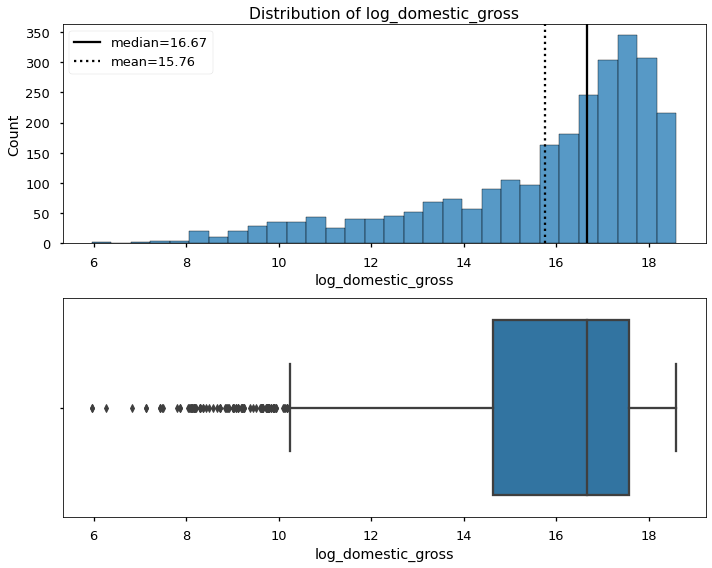

Skew = -1.301453313659885
Kurtosis = 1.0085556564565312


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of log_domestic_gross'}, xlabel='log_domestic_gross', ylabel='Count'>,
        <AxesSubplot:xlabel='log_domestic_gross'>], dtype=object))

In [96]:

plot_distribution(outliers_df[~idx_outliers],col='log_domestic_gross')

# scikit-learn

In [104]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
scaler = StandardScaler()
scaler

StandardScaler()

In [98]:
df['domestic_gross']

0      241,063,875.00
1       42,762,350.00
2      459,005,868.00
3      678,815,482.00
4      229,024,295.00
            ...      
3462       138,711.00
3463        94,596.00
3464         4,584.00
3465             0.00
3466             0.00
Name: domestic_gross, Length: 3467, dtype: float64

In [101]:
domestic_z_sk = scaler.fit_transform(df[['domestic_gross']])
domestic_z_sk


array([[ 2.88770625],
       [ 0.03930659],
       [ 6.01822125],
       ...,
       [-0.57486521],
       [-0.57493106],
       [-0.57493106]])

In [102]:
scaler.mean_

array([40025881.00144217])

In [103]:
scaler.inverse_transform(domestic_z_sk)

array([[2.41063875e+08],
       [4.27623500e+07],
       [4.59005868e+08],
       ...,
       [4.58400000e+03],
       [0.00000000e+00],
       [0.00000000e+00]])

In [120]:
transformer = QuantileTransformer(output_distribution='normal')
data = transformer.fit_transform(outliers_df[['domestic_gross']])

In [121]:
data.shape

(2968, 1)

In [122]:
data.flatten()

array([ 1.94477719,  0.44071422,  2.69731972, ..., -1.33421894,
       -1.41282504, -2.28749085])

In [123]:
outliers_df['tf_domestic_gross'] = data.flatten()

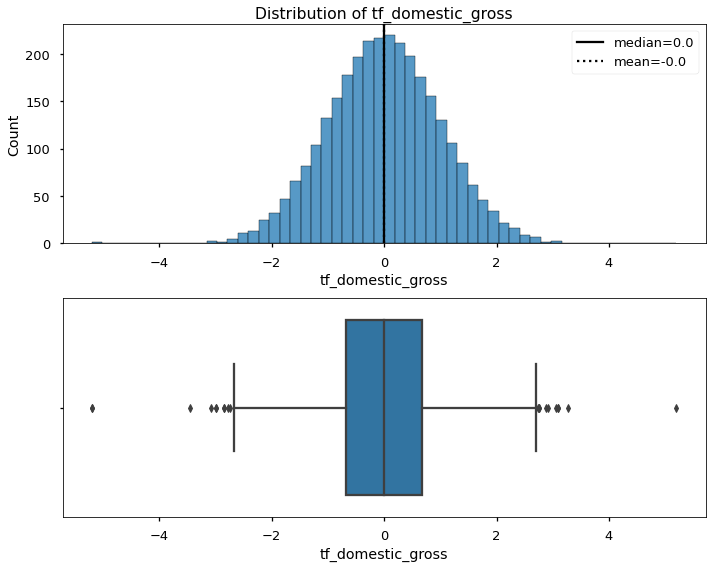

Skew = -0.03660477573754321
Kurtosis = 0.49177357678339817


(<Figure size 720x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Distribution of tf_domestic_gross'}, xlabel='tf_domestic_gross', ylabel='Count'>,
        <AxesSubplot:xlabel='tf_domestic_gross'>], dtype=object))

In [124]:
plot_distribution(outliers_df, col='tf_domestic_gross')